In [5]:
import pandas as pd
import numpy as np  # Add this import
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [6]:
# Load data for regression
data_regr = pd.read_excel("/Users/adamdanielgreen/Desktop/Business Statistics/Regression-20231218/Regression_data.xlsx")
data_regr.head()

,country,Digital_Index,Population,GDP,School,Internet
0,Burundi,0.261421,10488002.0,3.085768e+09,3.68108,2.400000
1,Niger,0.159881,20788789.0,1.023981e+10,3.50642,4.322758
2,Madagascar,0.251495,24894370.0,1.177517e+10,4.82550,4.713663
3,"Congo, Dem. Rep.",0.207798,78789130.0,3.882750e+10,6.60334,6.209974
4,Mozambique,0.253237,27829930.0,1.656097e+10,7.24369,7.000000


In [7]:
# Transform variables
data_regr['Population'] = data_regr['Population'].apply(lambda x: np.log(x))
data_regr['GDP'] = data_regr['GDP'].apply(lambda x: np.log(x))
# Remove rows with missing or infinite/nan values
data_regr = data_regr.replace([np.inf, -np.inf], np.nan).dropna()
data_regr.head()

,country,Digital_Index,Population,GDP,School,Internet
0,Burundi,0.261421,16.165742,21.850066,3.68108,2.400000
1,Niger,0.159881,16.849924,23.049549,3.50642,4.322758
2,Madagascar,0.251495,17.030152,23.189259,4.82550,4.713663
3,"Congo, Dem. Rep.",0.207798,18.182286,24.382395,6.60334,6.209974
4,Mozambique,0.253237,17.141623,23.530314,7.24369,7.000000


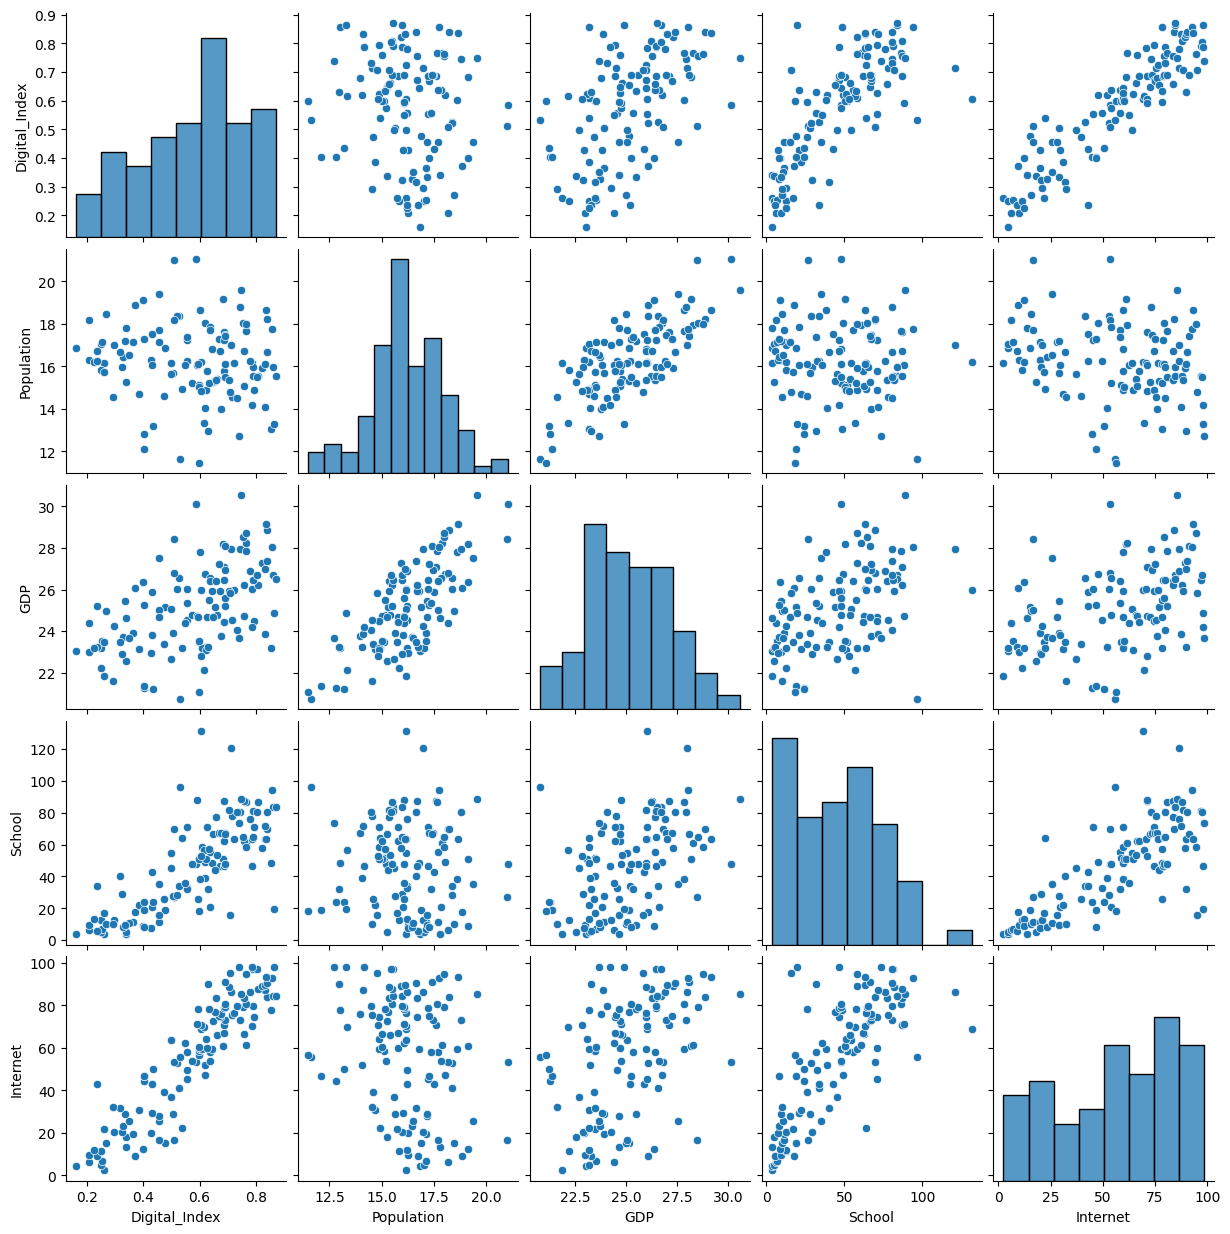

In [8]:
# Pair-wise relationships
sns.pairplot(data_regr.iloc[:, 1:6])
plt.show()

In [9]:
# Model Estimation
X = data_regr[['GDP', 'Population', 'School', 'Internet']]
y = data_regr['Digital_Index']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [10]:
# Summary of regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Digital_Index   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     189.8
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.14e-49
Time:                        13:42:40   Log-Likelihood:                 152.79
No. Observations:                 120   AIC:                            -295.6
Df Residuals:                     115   BIC:                            -281.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1851      0.098     -1.893      0.0

In [11]:
# Confidence Intervals on the Parameters
print(model.conf_int(alpha=0.05))

                   0         1
const      -0.378691  0.008557
GDP         0.015732  0.061845
Population -0.053037 -0.004632
School      0.000058  0.001442
Internet    0.002660  0.005124


In [12]:
# Define prediction variables
GDP = 23.05
Population = 16.49
School = 7
Internet = 5

# Create a DataFrame with prediction variables
prediction_info = pd.DataFrame({
    'GDP': GDP,
    'Population': Population,
    'School': School,
    'Internet': Internet
}, index=[0])

# Add a 'const' column
prediction_info['const'] = 1

# Get predictions and confidence intervals
predictions = model.get_prediction(prediction_info)
confidence_intervals = predictions.summary_frame(alpha=0.05)

# Display confidence intervals
print(confidence_intervals)

       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0 -3.820367  2.155209      -8.089422       0.448688     -8.091621   

   obs_ci_upper  
0      0.450888  


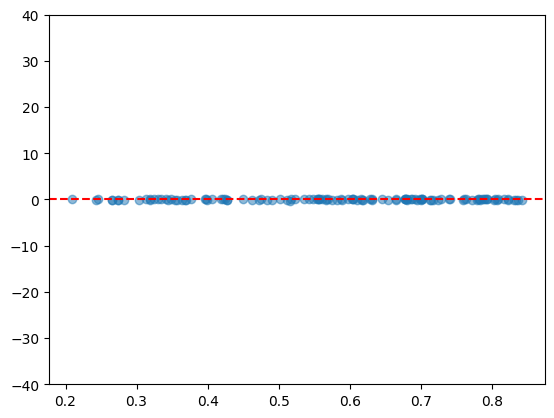

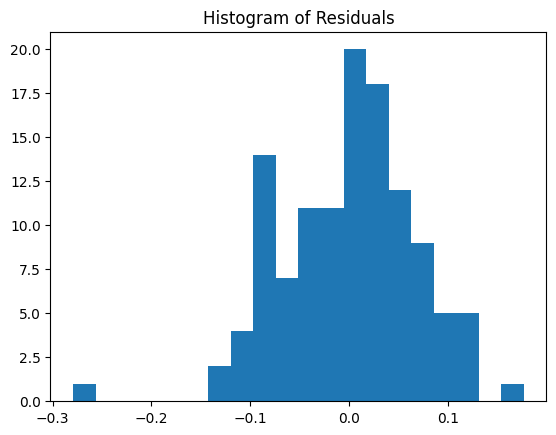

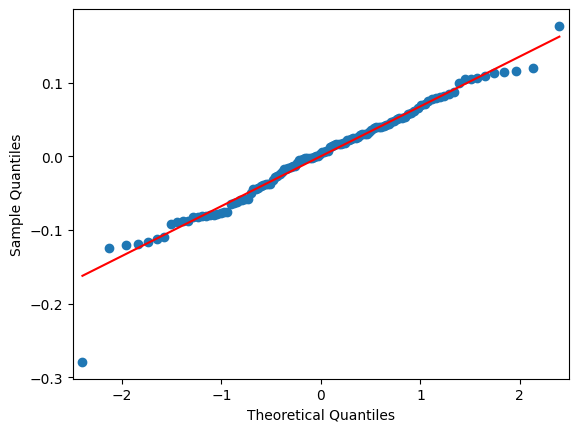

In [13]:
# Diagnostics
plt.scatter(model.fittedvalues, model.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.ylim(-40, 40)
plt.show()

plt.hist(model.resid, bins=20)
plt.title("Histogram of Residuals")
plt.show()

sm.qqplot(model.resid, line='s')
plt.show()

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
# Logistic Regression
Maintenance_data = pd.read_excel("/Users/adamdanielgreen/Desktop/Business Statistics/Classification-20231218/Maintenance_data.xlsx")

In [19]:
# Data preprocessing
# Convert categorical variables to numeric using Label Encoding
label_encoder = LabelEncoder()
Maintenance_data['Type'] = label_encoder.fit_transform(Maintenance_data['Type'])
Maintenance_data['Machine_failure'] = label_encoder.fit_transform(Maintenance_data['Machine_failure'])

In [20]:
# Split the dataset into training and test sets
X = Maintenance_data.drop(columns=['Machine_failure'])
X = X.drop(columns=['Product ID'])
y = Maintenance_data['Machine_failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

X.head()

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear
0,1,298.0,308.3,1473,42.6,107
1,1,297.4,309.2,1274,54.3,121
2,0,299.0,309.0,1436,43.9,20
3,1,298.2,308.2,1469,43.0,88
4,1,297.9,309.7,2194,16.8,27


In [21]:
# Model Estimation
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Print model summary
print(classification_report(y_test, logit_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        62
           1       0.91      0.84      0.88        38

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100

